In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
db=pd.read_csv("../Dataset/heart_disease_data.csv")

In [3]:
db.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
db=db.drop(columns=['trestbps','chol','fbs','restecg'], axis=1)

In [5]:
db.shape

(303, 10)

In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   cp       303 non-null    int64  
 3   thalach  303 non-null    int64  
 4   exang    303 non-null    int64  
 5   oldpeak  303 non-null    float64
 6   slope    303 non-null    int64  
 7   ca       303 non-null    int64  
 8   thal     303 non-null    int64  
 9   target   303 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 23.8 KB


In [7]:
db.describe()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


C:\Users\vivek kumar\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


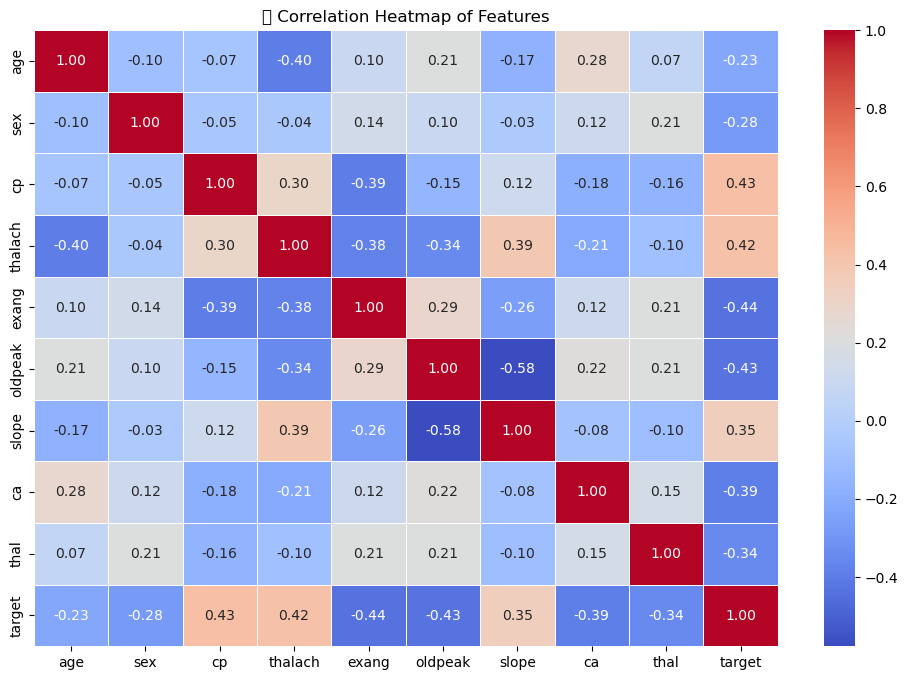

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is 'db'
plt.figure(figsize=(12, 8))
corr_matrix = db.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("🔍 Correlation Heatmap of Features")
plt.show()


In [9]:
X=db.drop(columns="target", axis=1)
y=db["target"]

In [10]:
scaler=StandardScaler()
scaler_X=scaler.fit_transform(X)

In [11]:
X_train,X_test,y_train,y_test=train_test_split(scaler_X,y, test_size=0.2,  stratify=y, random_state=42)

In [12]:
X_train.shape, X_test.shape

((242, 9), (61, 9))

In [13]:
X_train

array([[ 1.61392956, -1.46841752,  1.97312292, ...,  0.97635214,
         1.24459328, -0.51292188],
       [ 1.28306308,  0.68100522,  0.03203122, ..., -0.64911323,
         2.22410436, -2.14887271],
       [ 0.06988599, -1.46841752, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       ...,
       [-0.37126932, -1.46841752,  1.00257707, ...,  0.97635214,
        -0.71442887, -0.51292188],
       [ 0.06988599,  0.68100522,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       [ 1.06248543, -1.46841752, -0.93851463, ...,  0.97635214,
        -0.71442887, -0.51292188]])

In [14]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB()
}

In [15]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"📌 {name} Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))
    results.append((name, acc))

# 5. Display summary
print("\n📊 Accuracy Summary:")
pd.DataFrame(results, columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)

📌 Logistic Regression Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.86      0.64      0.73        28
           1       0.75      0.91      0.82        33

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.80      0.79      0.78        61

📌 Decision Tree Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.74      0.71      0.73        28
           1       0.76      0.79      0.78        33

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61

📌 Random Forest Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      

,Model,Accuracy
5,Naive Bayes,0.868852
3,K-Nearest Neighbors,0.852459
2,Random Forest,0.836066
4,Support Vector Machine,0.836066
0,Logistic Regression,0.786885
1,Decision Tree,0.754098


In [16]:
import pickle

svc_model = SVC()
svc_model.fit(X_train, y_train)


with open('Heartdieseas.pkl', 'wb') as f:
    pickle.dump(svc_model, f)


print("✅ Pickle files saved: 'Heartdieseas.pkl' and 'Heartdieseas_scaler.pkl'")

✅ Pickle files saved: 'Heartdieseas.pkl' and 'Heartdieseas_scaler.pkl'


In [52]:

# Load the saved Random Forest model
with open('Heartdieseas.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Make predictions using the loaded model
y_pred = loaded_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Loaded Model Accuracy: {accuracy:.2f}")
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))


✅ Loaded Model Accuracy: 0.84

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        28
           1       0.79      0.94      0.86        33

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



In [17]:
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the scaler.pkl
with open('Heartdieseas_scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Load the heartdiseas.pkl model
with open('Heartdieseas.pkl', 'rb') as f:
    heart_disease_model = pickle.load(f)

# Example input data (modify this with your own data structure)
input_data = {
    'age': [60], 
    'sex': [1], 
    'cp': [3], 
    'trestbps': [145], 
    'chol': [233], 
    'fbs': [1], 
    'restecg': [0], 
    'thalach': [150], 
    'exang': [0], 
    'oldpeak': [2.3], 
    'slope': [3], 
    'ca': [0], 
    'thal': [1]
}

# Convert input data to DataFrame
input_df = pd.DataFrame(input_data)

# Apply the scaler to the input data
scaled_input = scaler.transform(input_df)

# Predict using the heart disease model
prediction = heart_disease_model.predict(scaled_input)

# Print the prediction (0 for no heart disease, 1 for heart disease)
print(f'Prediction: {"Heart Disease" if prediction[0] == 1 else "No Heart Disease"}')


Prediction: Heart Disease
